# Project of Prediction of Breast Cancer 

In [3]:
# importing of libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# display of data
dataset=pd.read_csv(r"Breast_Cancer.csv")
dataset.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [5]:
dataset.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
dataset.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [8]:
dataset.shape

(4024, 16)

In [9]:
dataset.describe

<bound method NDFrame.describe of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35    

# Data Cleaning

#  1.Outlier Detection and Removal Using IQR

In [10]:
# outlier detection
dataset["Tumor Size"]>50

0       False
1       False
2        True
3       False
4       False
        ...  
4019    False
4020    False
4021    False
4022    False
4023    False
Name: Tumor Size, Length: 4024, dtype: bool

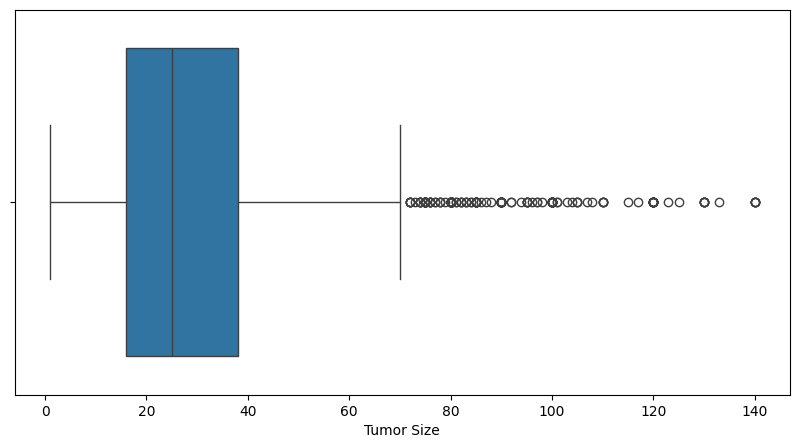

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Tumor Size",data=dataset)
plt.show()

In [12]:
q1=dataset["Tumor Size"].quantile(0.25)
q3=dataset["Tumor Size"].quantile(0.75)

In [13]:
IQR=q3-q1
IQR

np.float64(22.0)

In [14]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(np.float64(-17.0), np.float64(71.0))

In [15]:
new_dataset=dataset[dataset["Tumor Size"]<=max_range]

In [16]:
new_dataset.shape

(3802, 16)

In [23]:
# checking if the outliers are removed using visualization

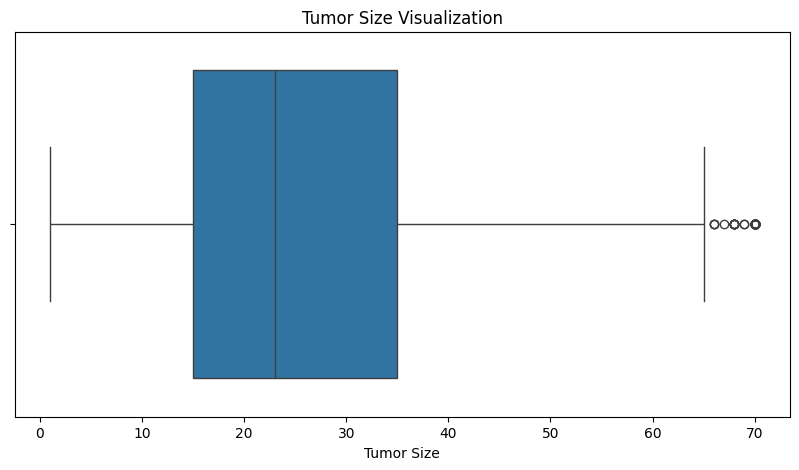

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Tumor Size",data=new_dataset)
plt.title("Tumor Size Visualization")
plt.show()

# 2.Changing the sequence of martial status

In [18]:
replacement_dict = {
    'Divorced': 'Married',
    'Single': 'Unmarried'
}

In [19]:
new_dataset['Marital Status'] = new_dataset['Marital Status'].replace(replacement_dict)

C:\Users\HP\AppData\Local\Temp\ipykernel_1404\2273814472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['Marital Status'] = new_dataset['Marital Status'].replace(replacement_dict)


# Encoding

# 1.Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Race', 'Marital Status', 'Estrogen Status','Progesterone Status','A Stage','Status']

le = LabelEncoder()


for column in columns_to_encode:
    new_dataset[column + '_encoded'] = le.fit_transform(new_dataset[column])


new_dataset


C:\Users\HP\AppData\Local\Temp\ipykernel_1404\765107326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[column + '_encoded'] = le.fit_transform(new_dataset[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_1404\765107326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset[column + '_encoded'] = le.fit_transform(new_dataset[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_1404\765107326.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,...,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_encoded,Marital Status_encoded,Estrogen Status_encoded,Progesterone Status_encoded,A Stage_encoded,Status_encoded
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,...,24,1,60,Alive,2,0,1,1,1,0
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,...,14,5,62,Alive,2,0,1,1,1,0
2,58,White,Married,T3,N3,IIIC,Moderately differentiated,2,Regional,63,...,14,7,75,Alive,2,0,1,1,1,0
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,...,2,1,84,Alive,2,0,1,1,1,0
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,...,3,1,50,Alive,2,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,...,1,1,49,Alive,1,0,1,1,1,0
4020,56,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,46,...,14,8,69,Alive,2,0,1,1,1,0
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,...,11,3,69,Alive,2,0,1,0,1,0
4022,58,Black,Married,T2,N1,IIB,Moderately differentiated,2,Regional,44,...,11,1,72,Alive,0,0,1,1,1,0


# EDA

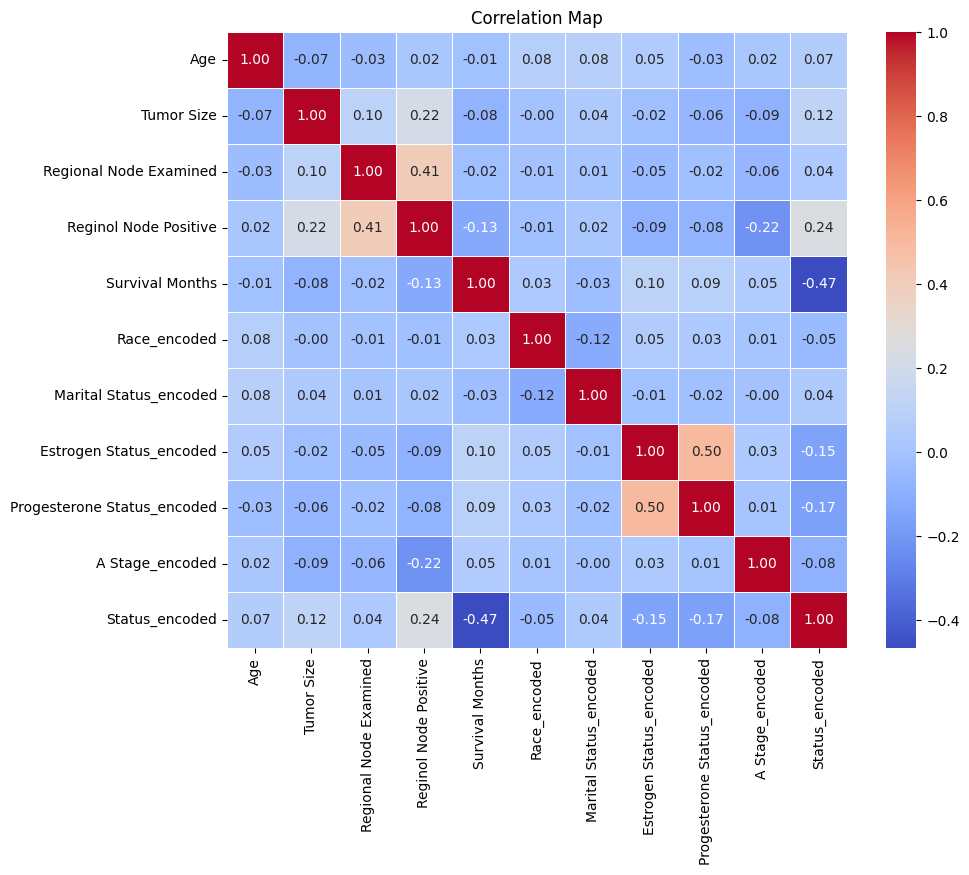

In [20]:
numeric_dataset = new_dataset.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_dataset.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the size as needed
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Map')
plt.show()

# Graph of every column against each other to determine linearity

In [22]:
# numerical_columns = new_dataset.select_dtypes(include=['float64', 'int64']).columns

# # Plot pairwise scatter plots for all numerical columns
# for i in range(len(numerical_columns)):
#     for j in range(i + 1, len(numerical_columns)):
#         plt.figure(figsize=(8, 6))
#         plt.scatter(new_dataset[numerical_columns[i]], new_dataset[numerical_columns[j]], alpha=0.5)
#         plt.title(f'Scatter Plot of {numerical_columns[i]} vs {numerical_columns[j]}')
#         plt.xlabel(numerical_columns[i])
#         plt.ylabel(numerical_columns[j])
#         plt.show()

In [22]:
# No linearty found using EDA

# Model Training

In [23]:
# chooing the right axis

In [24]:
x=new_dataset[["Tumor Size"]]
y=new_dataset["Progesterone Status_encoded"]

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Using Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
dt.score(x_test,y_test)*100

82.65440210249672

In [29]:
dt.score(x_train,y_train)*100

83.13054916146004

In [30]:
#  no major difference between test and training score hence model is not over-fitted

In [31]:
dt.predict([[63]])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Confusion Matrix and other Scores 

In [33]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


In [35]:
cf=confusion_matrix(y_test,dt.predict(x_test))
cf

array([[  0, 132],
       [  0, 629]])

In [38]:
precision_score(y_test,dt.predict(x_test))*100


np.float64(82.65440210249672)

In [39]:
recall_score(y_test,dt.predict(x_test))*100


np.float64(100.0)

In [41]:
f1_score(y_test,dt.predict(x_test))*100

np.float64(90.50359712230215)